# Data Analysis on the food receipes and ratings

**Name(s)**: Su Aye 

**Website Link**: https://suaye07.github.io/Analysis-of-recipes-and-ratings/

# Analysis Question: What is the relationship between the cooking time and average rating of recipes?

## Code

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.options.plotting.backend = 'plotly'
from tabulate import tabulate
import plotly.io as pio
pio.renderers.default = 'iframe'

### Cleaning and EDA

In [3]:
raw_interactions = pd.read_csv("RAW_interactions.csv")
raw_receipes = pd.read_csv("RAW_recipes.csv")

In [4]:
raw_interactions.shape

(731927, 5)

In [5]:
raw_receipes.shape

(83782, 12)

In [6]:
#combine two datasets raw_interactions and raw_receipes 
combined = pd.merge(raw_interactions, raw_receipes, left_on="recipe_id", right_on="id").drop('id', axis=1)
combined['rating'] = combined['rating'].apply(lambda x: np.nan if x == "0" else x)
combined

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,483827,306785,2008-07-15,5,Being a huge fan of America's Test Kitchen I...,spicy nectarine and corn salsa,40,377499,2008-06-02,"['60-minutes-or-less', 'time-to-make', 'course...","[95.3, 1.0, 50.0, 16.0, 5.0, 0.0, 7.0]",4,"['in a medium bowl , toss together nectarines ...",from my heros at america's test kitchen (cooks...,"['nectarines', 'ear of corn', 'shallot', 'haba...",8
1,5060,310237,2010-05-07,5,"wow red and white sweetness! DH loved them , ...",french strawberry crepes,30,452576,2008-06-19,"['30-minutes-or-less', 'time-to-make', 'course...","[143.5, 5.0, 25.0, 3.0, 10.0, 3.0, 7.0]",9,['for the filling: toss the strawberries and b...,yummy and sweet french-style strawberry breakf...,"['strawberries', 'brown sugar', 'cool whip fre...",10
2,935485,321038,2009-06-22,5,Being a healthy bar this is very good. I make...,hg s grab n go breakfast cookies weight wat...,22,346383,2008-08-24,"['30-minutes-or-less', 'time-to-make', 'course...","[182.4, 2.0, 50.0, 7.0, 11.0, 1.0, 13.0]",14,"['preheat oven to 375 degrees', 'chop raisins ...",i received a hungry girl email today and this ...,"['oats', 'whole wheat flour', 'fiber one cerea...",14
3,539686,321038,2011-03-28,5,My very health conscious daughter and I triple...,hg s grab n go breakfast cookies weight wat...,22,346383,2008-08-24,"['30-minutes-or-less', 'time-to-make', 'course...","[182.4, 2.0, 50.0, 7.0, 11.0, 1.0, 13.0]",14,"['preheat oven to 375 degrees', 'chop raisins ...",i received a hungry girl email today and this ...,"['oats', 'whole wheat flour', 'fiber one cerea...",14
4,22174,342209,2008-12-28,4,I am changing my initial review because they g...,banana oatmeal cookies,40,361931,2008-12-08,"['60-minutes-or-less', 'time-to-make', 'course...","[658.2, 45.0, 151.0, 35.0, 24.0, 72.0, 29.0]",7,"['sift flour , soda , baking powder and salt t...",a twist on an old favorite,"['sugar', 'butter', 'eggs', 'mashed banana', '...",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234423,1963163,451490,2015-05-23,5,Just made this for the first time today. This ...,pulled barbecued beef sandwiches,330,1502639,2011-03-24,"['weeknight', 'course', 'main-ingredient', 'pr...","[351.1, 15.0, 37.0, 37.0, 57.0, 17.0, 11.0]",11,['trim fat from meat and cut to fit in a 3-1 /...,"""pulled"" this recipe off of yahoo shine and my...","['beef brisket', 'ro-tel tomatoes', 'applesauc...",8
234424,169430,492861,2013-01-09,5,I have made this for the second (and this time...,omani coffee,13,37449,2013-01-03,"['15-minutes-or-less', 'time-to-make', 'course...","[16.3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",13,['preparing the beans: roast the ground beans ...,the omani people are well known for their hosp...,"['water', 'coffee', 'ground cardamom', 'whole ...",4
234425,128473,492861,2013-02-08,5,I love coffee and I adore cardamom. This was ...,omani coffee,13,37449,2013-01-03,"['15-minutes-or-less', 'time-to-make', 'course...","[16.3, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",13,['preparing the beans: roast the ground beans ...,the omani people are well known for their hosp...,"['water', 'coffee', 'ground cardamom', 'whole ...",4
234426,169430,470995,2013-04-17,5,Just as the title promised this is a lovely sh...,perfectly fried shrimps with garlic,8,2124513,2011-12-31,"['15-minutes-or-less', 'time-to-make', 'course...","[397.0, 62.0, 0.0, 8.0, 10.0, 28.0, 1.0]",25,"['preparation', 'rinse the shrimps with cold w...",succulent shrimps fried in olive oil with cara...,"['shrimp', 'garlic cloves', 'olive oil']",3


In [7]:
combined_cleaned = combined.dropna(subset=['rating'])
average_rating_per_recipe = combined_cleaned.groupby(['recipe_id', 'name'])['rating'].mean()
average_rating_per_recipe

recipe_id  name                                      
275022     impossible macaroni and cheese pie            3.0
275024     impossible rhubarb pie                        3.0
275026     impossible seafood pie                        3.0
275030     paula deen s caramel apple cheesecake         5.0
275032     midori poached pears                          5.0
                                                        ... 
537459     bailey s chocotini                            5.0
537485     5 ingredient salted caramel crumble bars      5.0
537543     moist gingerbread cake                        0.0
537671     nutcracker peppermint red velvet cake pops    0.0
537716     mini buffalo chicken cheesesteaks             5.0
Name: rating, Length: 83780, dtype: float64

In [8]:
combined_cleaned = combined.dropna(subset=['minutes'])
average_minutes_per_recipe = combined_cleaned.groupby(['recipe_id', 'name'])['minutes'].mean()
average_minutes_per_recipe

recipe_id  name                                      
275022     impossible macaroni and cheese pie             50.0
275024     impossible rhubarb pie                         55.0
275026     impossible seafood pie                         45.0
275030     paula deen s caramel apple cheesecake          45.0
275032     midori poached pears                           25.0
                                                         ...  
537459     bailey s chocotini                             10.0
537485     5 ingredient salted caramel crumble bars       45.0
537543     moist gingerbread cake                         55.0
537671     nutcracker peppermint red velvet cake pops    135.0
537716     mini buffalo chicken cheesesteaks              40.0
Name: minutes, Length: 83780, dtype: float64

In [9]:
merged_data = pd.merge(combined, average_rating_per_recipe, left_on="recipe_id", right_on="recipe_id")
merged_data = merged_data.drop('rating_x', axis=1)
merged_data = merged_data.rename(columns={'rating_y': 'mean_rating'})
merged_data = merged_data['user_id'].unique()
len(merged_data)

67267

# Univariate Analysis

In [10]:
combined_cleaned = combined.dropna(subset=['rating'])
average_rating_per_recipe = combined_cleaned.groupby(['n_ingredients'])['rating'].mean()
df_average_rating = average_rating_per_recipe.reset_index().set_index(['n_ingredients'])
df_average_rating_sorted = df_average_rating.sort_values('n_ingredients', ascending=True)
df_average_rating_sorted

,rating
n_ingredients,
1,4.302083
2,4.328767
3,4.441945
4,4.435266
5,4.398439
6,4.389068
7,4.371794
8,4.381403
9,4.376274


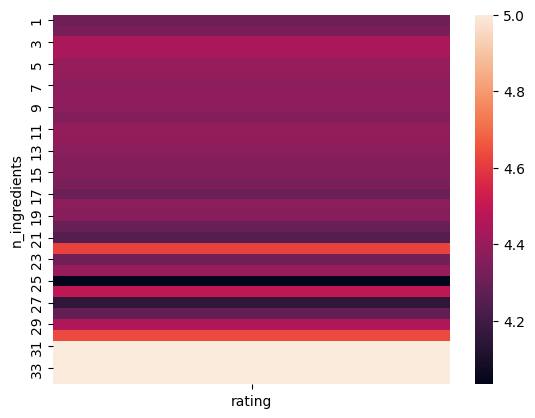

In [11]:
heatTest = sns.heatmap(df_average_rating_sorted)

In [10]:
# Creating the histogram
fig = px.histogram(df_average_rating_sorted, x='rating', nbins=10)

# Adding labels and title
fig.update_layout(
    xaxis_title='Average Rating',
    yaxis_title='Frequency',
    title='Distribution of Average Rating per Recipe'
)

# Displaying the histogram
fig.show()
fig.write_html('average_rating_histogram.html')

In [11]:
combined_cleaned = combined.dropna(subset=['rating'])
average_rating_per_recipe = combined_cleaned.groupby('rating')['recipe_id'].count()
df_average_rating = average_rating_per_recipe.reset_index()
df_average_rating = df_average_rating.set_index('rating')
df_average_rating.columns = ['recipe_count']
df_average_rating

,recipe_count
rating,
0,15035
1,2870
2,2368
3,7172
4,37307
5,169676


In [12]:
# Creating the pie chart
fig = go.Figure(data=[go.Pie(labels=df_average_rating.index, values=df_average_rating['recipe_count'])])

# Adding title
fig.update_layout(title='Recipe Count Distribution')
fig.update_layout(
    height=400,  
    width=600   
)

# Displaying the pie chart
fig.show()

# Bivariate Analysis

In [27]:
# Bivariate Analysis
correlation = merged_data['minutes'].corr(merged_data['mean_rating'])
print("Correlation coefficient between Cooking Time and Average Rating: {:.5f}".format(correlation))

fig = px.scatter(merged_data, x='minutes', y='mean_rating', title='Cooking Time vs Average Rating')

# Customize the plot layout
fig.update_layout(
    xaxis_title='Cooking Time (minutes)',
    yaxis_title='Average Rating'
)
# Display the plot
fig.show()

Correlation coefficient between Cooking Time and Average Rating: -0.00399


A negative correlation coefficient shows an inverse relationship between the two variables being analyzed. In this analysis between cooking time and average rating of recipes, a negative correlation coefficient suggests that as the cooking time increases, the average rating tends to decrease, and vice versa. However, it's -0.00399 which indicates the very less impact between this two cooking time and rating correlation interact. 

In [14]:
# Bivariate Analysis
correlation = merged_data['minutes'].corr(merged_data['n_steps'])
print("Correlation coefficient between Cooking Time and Steps to make: {:.5f}".format(correlation))

fig = px.scatter(merged_data, x='minutes', y='n_steps', title='Cooking Time vs Steps to make')

# Customize the plot layout
fig.update_layout(
    xaxis_title='Cooking Time (minutes)',
    yaxis_title='Steps to make'
)

# Display the plot
fig.show()
fig.write_html('cooking_time_vs_steps.html')

Correlation coefficient between Cooking Time and Steps to make: 0.01169


This also indicates a very weak positive correlation. Overall, the analysis suggests a negligible relationship between cooking time and the number of steps to make in the dataset.

In [15]:
# from 2018 with the meaning rating 5 and minutes less than 20 minutes items name 
r5_less20min = merged_data[(merged_data['mean_rating'] == 5) & (merged_data['minutes'] < 20)& (merged_data['submitted'] >= '2018-01-01')]
sorted_data = r5_less20min.drop_duplicates(subset='name', keep='last')
sorted_data

,user_id,recipe_id,date,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,mean_rating
7783,2002190486,535300,2018-06-18,Thank you! Thank you! Thank you! Thank you!!,firecracker shrimp tacos,12,33186,2018-03-07,"['15-minutes-or-less', 'time-to-make', 'course...","[414.4, 24.0, 5.0, 53.0, 36.0, 6.0, 16.0]",12,"['shrimp:', 'in a shallow baking dish or bowl ...",this shrimp recipe will light up your taco night.,"['large shrimp', 'cornstarch', 'kosher salt', ...",12,5.0
25709,305531,537459,2018-11-13,Yum. What's not to like with this one. It was ...,bailey s chocotini,10,400708,2018-11-10,"['15-minutes-or-less', 'time-to-make', 'course...","[220.7, 15.0, 49.0, 2.0, 3.0, 30.0, 4.0]",5,"['to layer: add chocolate liqueur to glass', '...",a recipe that recipe complements the cocoa in ...,"['baileys irish cream', 'chocolate liqueur', '...",3,5.0
123400,2002173957,535282,2018-06-03,It was the Best Apple dip ever! I ended up mak...,after school apple dip,10,2002028772,2018-03-06,"['15-minutes-or-less', 'time-to-make', 'course...","[171.3, 14.0, 75.0, 4.0, 3.0, 27.0, 6.0]",2,['place the cream cheese and brown sugar onto ...,quick and tasty after school treat,"['cream cheese', 'brown sugar', 'vanilla', 'al...",4,5.0
154895,2000999552,535267,2018-09-29,Thank you for this wonderful recipe. Its quick...,cheese sauce quick and easy,15,233780,2018-03-05,"['15-minutes-or-less', 'time-to-make', 'course...","[475.9, 54.0, 0.0, 25.0, 29.0, 111.0, 8.0]",5,['melt butter in pan and add the flour with so...,a smooth creamy cheese sauce thats great over ...,"['butter', 'milk', 'flour', 'mustard', 'cheese']",5,5.0
166640,227652,535952,2018-10-31,"This was wonderful. That's my main review, but...",fried rice spice,5,102724,2018-06-08,"['15-minutes-or-less', 'time-to-make', 'course...","[8.2, 0.0, 1.0, 8.0, 0.0, 0.0, 0.0]",2,"['mix all ingredients well', 'store in a seale...",this is a go to for convenience. it's a lot li...,"['garlic powder', 'ginger powder', 'sugar', 's...",5,5.0
199291,2001592857,535104,2018-02-20,"Wow, who knew browned butter was for sweets AN...",fruit loop treats,15,2001968497,2018-02-06,"['15-minutes-or-less', 'time-to-make', 'course...","[184.9, 9.0, 82.0, 7.0, 2.0, 19.0, 10.0]",20,"['lightly butter a large heatproof bowl , add ...","fruity, slightly elevated, ridiculously easy a...","['unsalted butter', 'fruit loops cereal', 'min...",6,5.0
200206,1925885,536060,2018-07-18,Excellent! I made this on the spur of the mome...,tuna poke,15,1052873,2018-06-24,"['15-minutes-or-less', 'time-to-make', 'main-i...","[165.1, 10.0, 10.0, 15.0, 41.0, 7.0, 1.0]",4,"['put seaweeds in separate bowls , cover with ...",hawaiian raw tuna salad.,"['wakame seaweed', 'hijiki seaweed', 'tuna', '...",11,5.0


In [16]:
sorted_data_unique = sorted_data.sort_values('minutes',ascending=False)

fig = go.Figure(data=[
    go.Bar(y=sorted_data_unique['name'], x=sorted_data_unique['minutes'], name='Cooking Time', orientation='h'),
    go.Bar(y=sorted_data_unique['name'], x=sorted_data_unique['n_steps'], name='Number of Steps', orientation='h')
])

# Customize the plot layout
fig.update_layout(
    title='Top rating 5 orders comparing the cooking time and number of steps to make(2018-)',
    yaxis_title='Recipe Name',
    xaxis_title='Value',
    height=450,  
    width=800  
)

# Display the plot
fig.show()
fig.write_html('top_orders_bar_plot.html')

# Interesting Aggregates

This agregates take the mean of the rating for each items and assign to the minutes that take each item to make and list it in an assencding order. 

In [17]:
grouped_data = merged_data.groupby('name').agg({
    'minutes': 'mean',
    'mean_rating': 'mean'
})

# Pivot the grouped data by 'name' and examine aggregate statistics on 'minutes' and 'mean_rating'
pivot_table = pd.pivot_table(grouped_data, index='name', values=['minutes', 'mean_rating'])
pivot_table_sorted = pivot_table.sort_values('minutes', ascending=True)

# Print the pivot table
pivot_table_sorted

,mean_rating,minutes
name,,
vegan parmesan,5.0,0.0
southern comfort punch,2.5,1.0
s o s dip a k a dried beef dip,5.0,1.0
s o s beverage,5.0,1.0
russian root beer,4.0,1.0
...,...,...
peach cordial,3.0,86415.0
homemade vanilla extract,0.0,129600.0
homemade vanilla,5.0,259205.0


This another analysis put the category into the minutes it takes to make the food and calculate the mean of the rating for each category. 

In [18]:
merged_data['cooking_time_category'] = pd.cut(merged_data['minutes'], bins=[0, 30, 60, 90, float('inf')], labels=['0-30', '30-60', '60-90', '90+'])
avg_rating_by_category = merged_data.groupby('cooking_time_category')['mean_rating'].mean().reset_index()

# Create a pivot table
pivot_table = pd.pivot_table(avg_rating_by_category, values='mean_rating', index='cooking_time_category')

# Display the pivot table
print("Average Rating by Cooking Time Category:\n")
pivot_table

Average Rating by Cooking Time Category:



,mean_rating
cooking_time_category,
0-30,4.448872
30-60,4.367158
60-90,4.310285
90+,4.223956


# Assessment of Missingness

In [19]:
merged_mini = merged_data[['review', 'description','n_steps']]

def permutation_test(variable):
    testing_df = merged_mini.copy()[[variable, 'description']]
    testing_df['description_affected_missing'] = testing_df['description'].isna()
    dist = (
        testing_df.pivot_table(index=variable, columns='description_affected_missing', aggfunc='size')
    )
    dist.columns = ['description = False', 'description = True']
    dist = dist / dist.sum()
    plot = dist.plot(kind='barh', title=str(variable) + ' by Missingness of description counts', barmode='group')
    plot.show()
    plot.write_html("Assessment_of_Missingness.html")
    
    n_repetitions = 100
    shuffled = testing_df.copy()
    tvds = []
    for _ in range(n_repetitions):
        shuffled[variable] = np.random.permutation(shuffled[variable])
        pivoted = (
            shuffled
            .pivot_table(index=variable, columns='description_affected_missing', aggfunc='size')
            .apply(lambda x: x / x.sum())
        )
        tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
        tvds.append(tvd)

    observed_tvd = dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
    p_value = (np.array(tvds) >= observed_tvd).mean()
    return p_value

In [20]:
permutation_test('n_steps')

0.05

# Hypothesis Testing

Analysis Question: What is the relationship between the cooking time and average rating of recipes?

Null Hypothesis:The relationship between the cooking time and average rating of recipes is the greater the rating is the less cooking prep time to fullfill customer satisfaction. 

Alternative Hypothesis: The relationship between the cooking time and average rating of recipes is the greater the rating is the more cooking prep time to prepare the better food. 


In [21]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Step 1: Extract the relevant columns
cooking_time = merged_data['minutes']
average_rating = merged_data['mean_rating']

# Step 2: Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(cooking_time, average_rating)

# Step 3: Print the results
print("Correlation coefficient:", correlation)
print("P-value:", p_value)


Correlation coefficient: -0.003993247071403871
P-value: 0.053182722882732604


Test Statistic: Mean Proportion of the cooking time and mean proportion of the rating

Siginificance level: 0.05

p-value: 0.05318

Conclusion: Since p-value is >0.05, we fail to reject the null hypothesis. 

### Tables for Website

In [22]:
print(df_average_rating_sorted.head().to_markdown(index=True))

|   n_ingredients |   rating |
|----------------:|---------:|
|               1 |  4.30208 |
|               2 |  4.32877 |
|               3 |  4.44194 |
|               4 |  4.43527 |
|               5 |  4.39844 |


In [23]:
print(df_average_rating.head().to_markdown(index=True))

|   rating |   recipe_count |
|---------:|---------------:|
|        0 |          15035 |
|        1 |           2870 |
|        2 |           2368 |
|        3 |           7172 |
|        4 |          37307 |


In [24]:
print(pivot_table_sorted.head().to_markdown(index=True))

| name                            |   mean_rating |   minutes |
|:--------------------------------|--------------:|----------:|
| vegan parmesan                  |           5   |         0 |
| southern comfort punch          |           2.5 |         1 |
| s o s dip  a k a dried beef dip |           5   |         1 |
| s o s   beverage                |           5   |         1 |
| russian root beer               |           4   |         1 |


In [25]:
print(pivot_table_sorted.tail().to_markdown(index=True))

| name                      |   mean_rating |         minutes |
|:--------------------------|--------------:|----------------:|
| peach cordial             |             3 |  86415          |
| homemade vanilla extract  |             0 | 129600          |
| homemade vanilla          |             5 | 259205          |
| homemade fruit liquers    |             4 | 288000          |
| how to preserve a husband |             5 |      1.0512e+06 |


In [26]:
print(pivot_table.head().to_markdown(index=True))

| cooking_time_category   |   mean_rating |
|:------------------------|--------------:|
| 0-30                    |       4.44887 |
| 30-60                   |       4.36716 |
| 60-90                   |       4.31028 |
| 90+                     |       4.22396 |
